In [2]:
import numpy as np
import pandas as pd
import os

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
import torch
torch.__version__

'2.0.0+cu118'

In [8]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [10]:
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:06<00:00, 41.7MB/s]
100% 225M/225M [00:06<00:00, 38.5MB/s]


In [11]:
!unzip \*.zip && rm *.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [12]:
data_path = '/content/flowers' 

In [29]:
tfms_for_item = RandomResizedCrop(128, min_scale = 0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)] #pytorch-da 0.5,0.5, 0.5
data = ImageDataLoaders.from_folder(data_path, item_tfms = tfms_for_item,
                                    batch_tfms= tfms_for_batch,bs = 15,
                                    valid_pct = 0.15, shuffle = True)

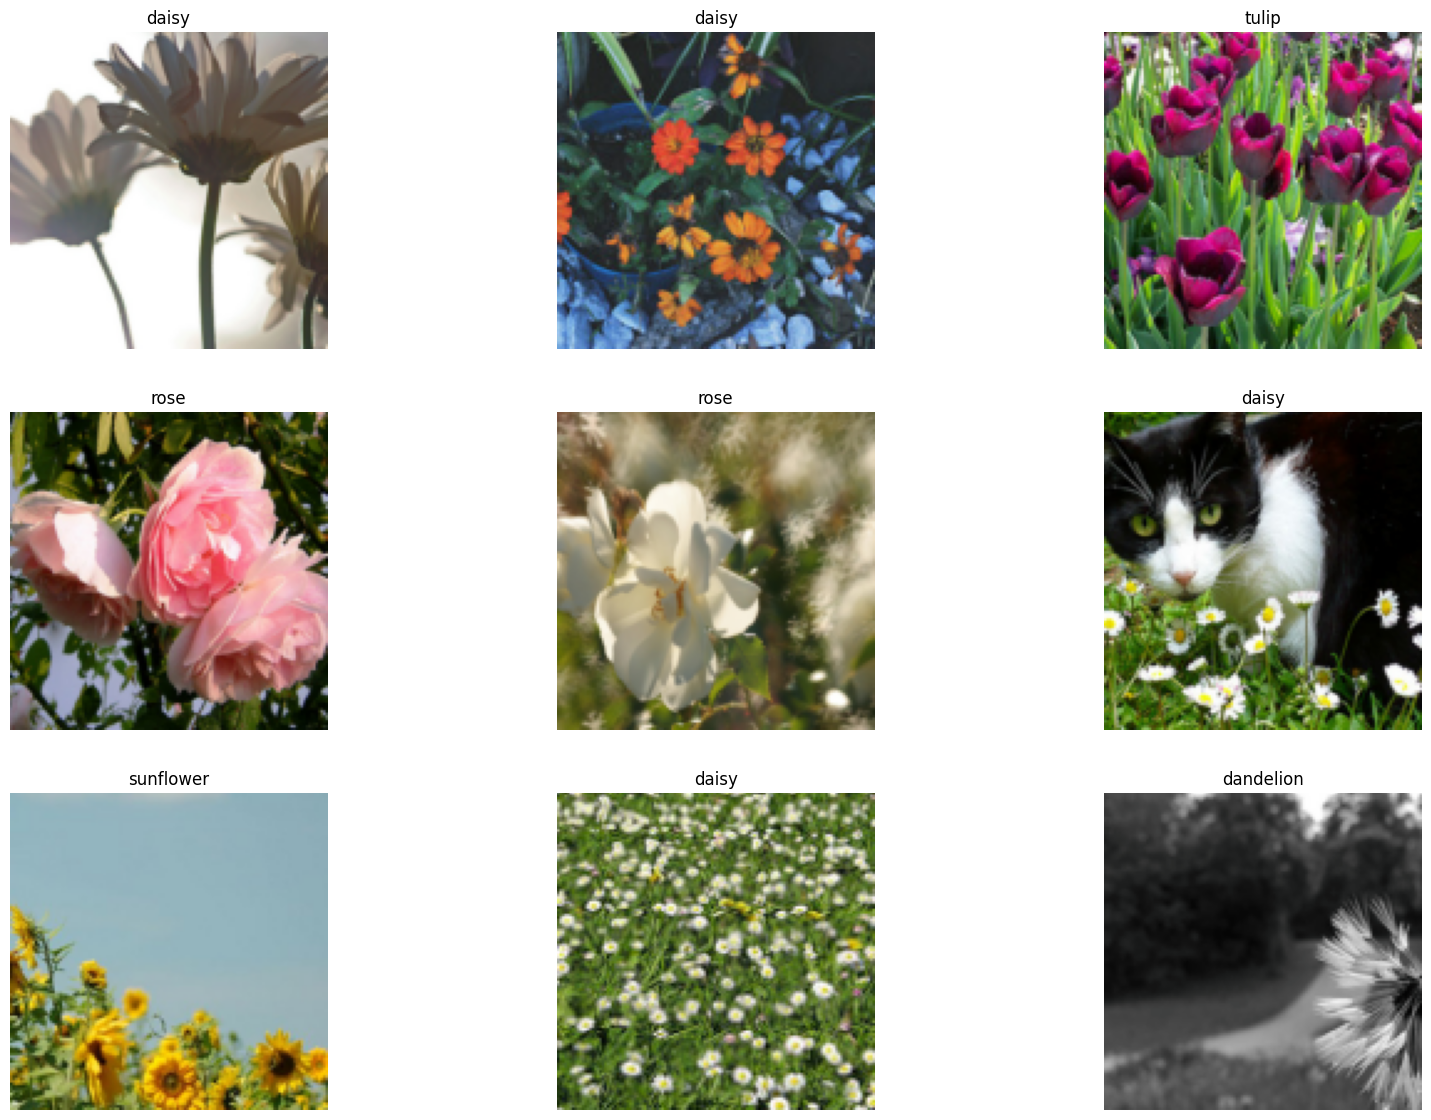

In [30]:
data.show_batch(figsize = (20,14))

In [31]:
print('Number  of classes :', data.c)

Number  of classes : 5


In [32]:
model = cnn_learner(data, resnet50, metrics = accuracy)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


SuggestedLRs(valley=0.0006918309954926372)

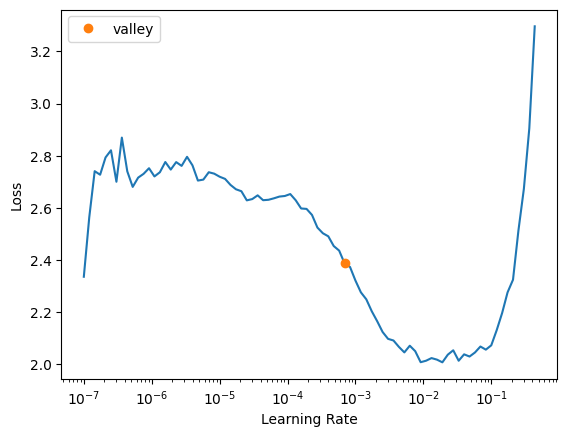

In [33]:
model.lr_find()

In [34]:
model.fit_one_cycle(3,0.00069)

In [35]:
model.save('my_model.pkl')

Path('/content/flowers/models/my_model.pkl.pth')

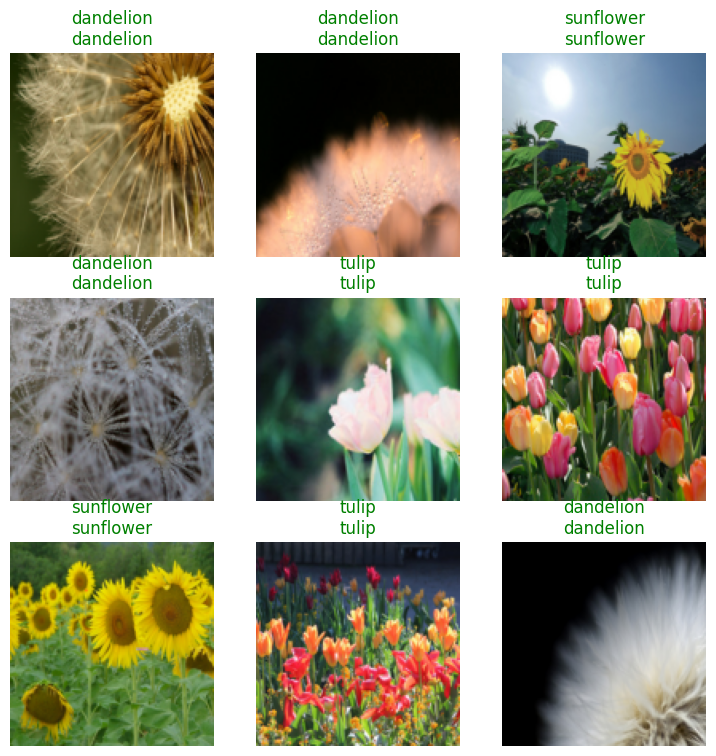

In [36]:
model.show_results()

In [37]:
interp=ClassificationInterpretation.from_learner(model)

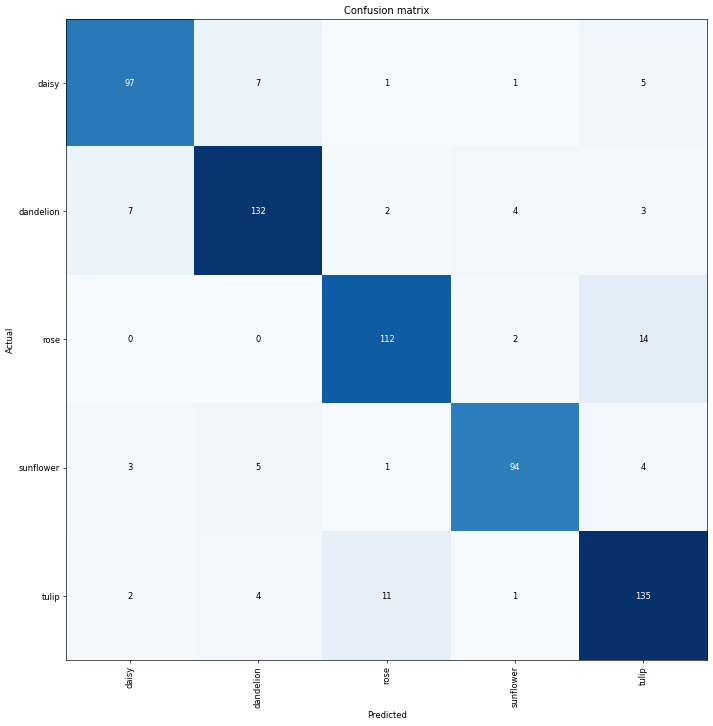

In [38]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)


In [40]:
interp.most_confused(min_val = 2)

[('rose', 'tulip', 14),
 ('tulip', 'rose', 11),
 ('daisy', 'dandelion', 7),
 ('dandelion', 'daisy', 7),
 ('daisy', 'tulip', 5),
 ('sunflower', 'dandelion', 5),
 ('dandelion', 'sunflower', 4),
 ('sunflower', 'tulip', 4),
 ('tulip', 'dandelion', 4),
 ('dandelion', 'tulip', 3),
 ('sunflower', 'daisy', 3),
 ('dandelion', 'rose', 2),
 ('rose', 'sunflower', 2),
 ('tulip', 'daisy', 2)]

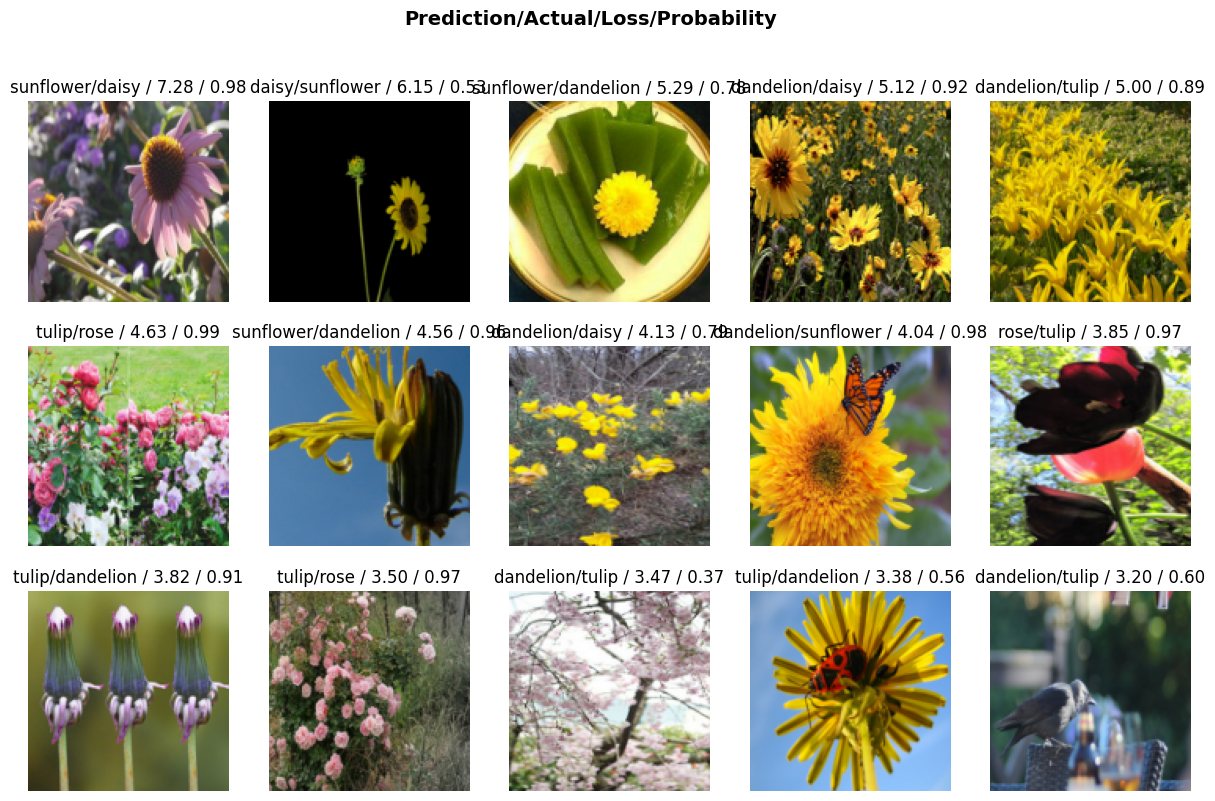

In [41]:
interp.plot_top_losses(k=15)